In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
data = pd.read_csv("our_data.csv")
prep_data = pd.read_csv("our_data_preprocessed.csv")


In [58]:
prep_data.columns

Index(['Price', 'Rating', 'processor_tier', 'num_cores', 'num_threads',
       'ram_memory', 'primary_storage_capacity', 'secondary_storage_type',
       'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'year_of_warranty', 'total_number_of_pixels',
       'total_pixels_per_square_of_diag', 'gpu_brand_amd', 'gpu_brand_apple',
       'gpu_brand_intel', 'gpu_brand_nvidia', 'gpu_type_integrated',
       'OS_chrome', 'OS_other', 'OS_ubuntu', 'OS_windows', 'brand_acer',
       'brand_asus', 'brand_avita', 'brand_chuwi', 'brand_dell',
       'brand_fujitsu', 'brand_gigabyte', 'brand_honor', 'brand_hp',
       'brand_iball', 'brand_infinix', 'brand_jio', 'brand_lenovo', 'brand_lg',
       'brand_microsoft', 'brand_msi', 'brand_realme', 'brand_samsung',
       'brand_tecno', 'brand_ultimus', 'brand_walker', 'brand_wings',
       'brand_zebronics', 'processor_brand_amd', 'processor_brand_intel',
       'primary_storage_type_SSD'],
      dtype='object')

In [59]:
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Price                            792 non-null    float64
 1   Rating                           792 non-null    float64
 2   processor_tier                   792 non-null    int64  
 3   num_cores                        792 non-null    float64
 4   num_threads                      792 non-null    float64
 5   ram_memory                       792 non-null    float64
 6   primary_storage_capacity         792 non-null    float64
 7   secondary_storage_type           792 non-null    int64  
 8   is_touch_screen                  792 non-null    int64  
 9   display_size                     792 non-null    float64
 10  resolution_width                 792 non-null    float64
 11  resolution_height                792 non-null    float64
 12  year_of_warranty      

<h1>Finding optimal number of clusters<h1>

<h3>1.Using elbow method<h3>

In [60]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

<h3>2. Using silhouette score<h3>

In [61]:
def count_silhouette_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores


<h3>3. Using Calinski-Harabasz score<h3>

In [62]:
def count_calinski_harabasz_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):  # Calinski-Harabasz score nie działa dla k=1
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = calinski_harabasz_score(X, labels)
        scores.append(score)
    return scores


<h3>4. Using Davies - Bouldin score<h3>

In [63]:
def count_davies_bouldin_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):  # Davies-Bouldin score nie działa dla k=1
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = davies_bouldin_score(X, labels)
        scores.append(score)
    return scores

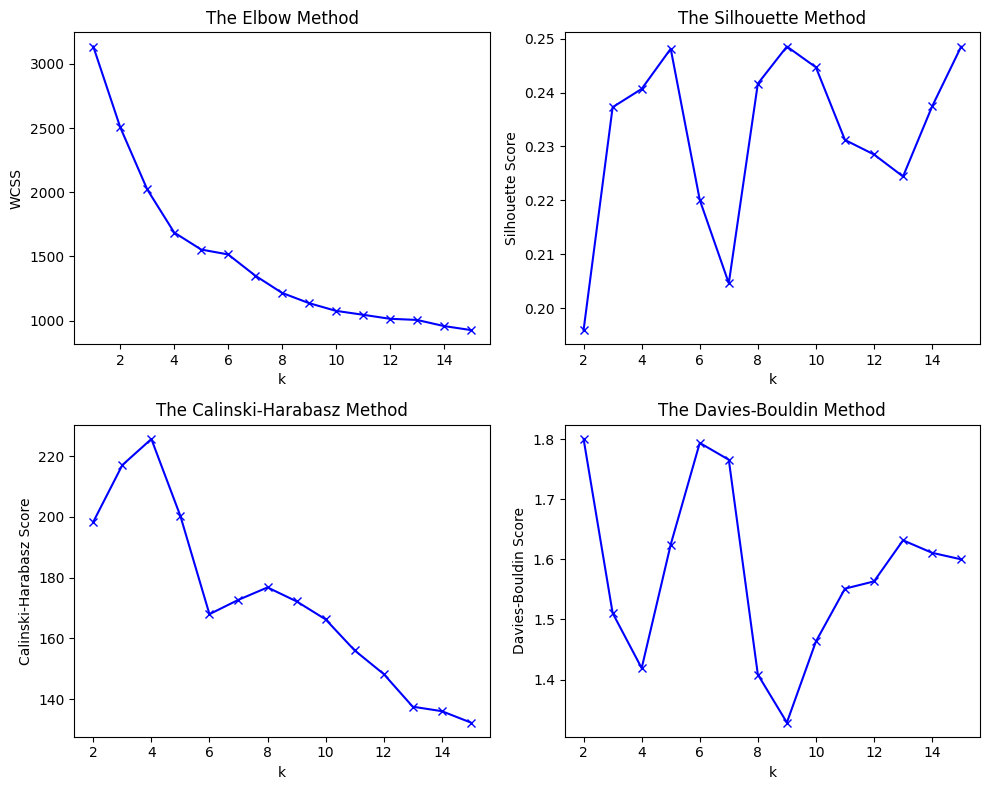

In [64]:
k_max = 15
wcss_vec = count_wcss_scores(prep_data, k_max)
silhouette_vec = count_silhouette_scores(prep_data, k_max)
calinski_harabasz_vec = count_calinski_harabasz_scores(prep_data, k_max)
davies_bouldin_vec = count_davies_bouldin_scores(prep_data, k_max)

x_ticks_wcss = list(range(1, len(wcss_vec) + 1))
x_ticks_silhouette = list(range(2, len(silhouette_vec) + 2))
x_ticks_calinski_harabasz = list(range(2, len(calinski_harabasz_vec) + 2))
x_ticks_davies_bouldin = list(range(2, len(davies_bouldin_vec) + 2))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#wcss
axs[0, 0].plot(x_ticks_wcss, wcss_vec, 'bx-')
axs[0, 0].set_xlabel('k')
axs[0, 0].set_ylabel('WCSS')
axs[0, 0].set_title('The Elbow Method')

#silhouette
axs[0, 1].plot(x_ticks_silhouette, silhouette_vec, 'bx-')
axs[0, 1].set_xlabel('k')
axs[0, 1].set_ylabel('Silhouette Score')
axs[0, 1].set_title('The Silhouette Method')

#Calinski-Harabasz
axs[1, 0].plot(x_ticks_calinski_harabasz, calinski_harabasz_vec, 'bx-')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('Calinski-Harabasz Score')
axs[1, 0].set_title('The Calinski-Harabasz Method')

#Davies-Bouldin
axs[1, 1].plot(x_ticks_davies_bouldin, davies_bouldin_vec, 'bx-')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('Davies-Bouldin Score')
axs[1, 1].set_title('The Davies-Bouldin Method')

plt.tight_layout()
plt.show()

Based on the above plots, we choose k = 4 and k = 9 for clustering with KMeans.

<h1>Clustering with KMeans<h1>


In [65]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
prep_data['Cluster_k4'] = kmeans.fit_predict(prep_data)
# number of observations in each cluster
print(prep_data['Cluster_k4'].value_counts())
# mean values for each cluster
cluster_summary = prep_data.groupby('Cluster_k4').mean()
print(cluster_summary)


Cluster_k4
3    285
1    231
2    147
0    129
Name: count, dtype: int64
               Price    Rating  processor_tier  num_cores  num_threads  \
Cluster_k4                                                               
0           0.410069  0.444798        4.007752   0.394289     0.450992   
1           0.501079  0.463186        4.290043   0.604155     0.494921   
2           0.315623  0.296210        2.401361   0.246061     0.253861   
3           0.602132  0.634673        4.726316   0.613484     0.580766   

            ram_memory  primary_storage_capacity  secondary_storage_type  \
Cluster_k4                                                                 
0             0.284086                  0.678295                0.000000   
1             0.349631                  0.700577                0.004329   
2             0.176871                  0.582766                0.013605   
3             0.387410                  0.730409                0.028070   

            is_touch_scre

<h1>PCA<h1>

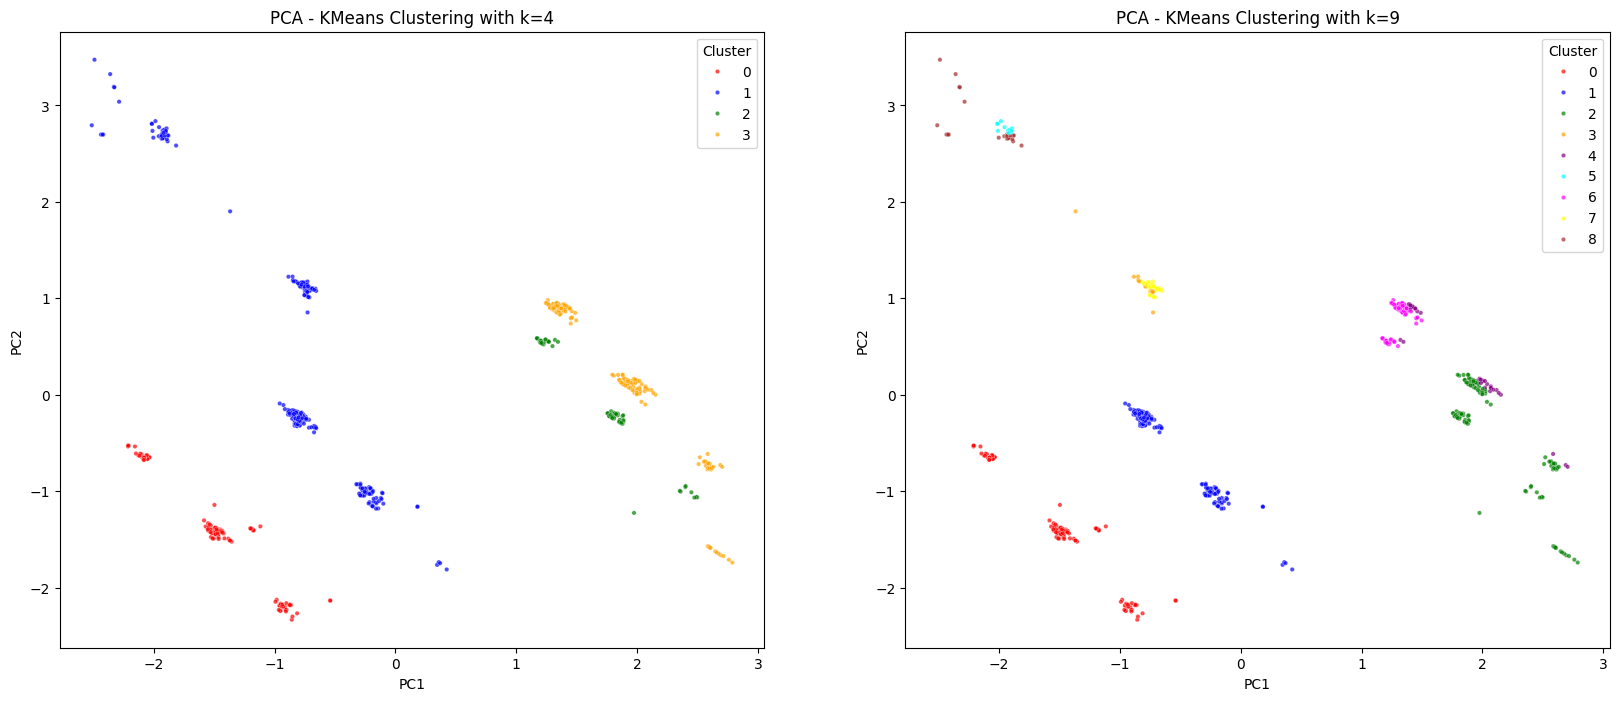

In [67]:

kmeans_k4 = KMeans(n_clusters=4, random_state=0)
data['Cluster_k4'] = kmeans_k4.fit_predict(prep_data)


kmeans_k9 = KMeans(n_clusters=9, random_state=0)
data['Cluster_k9'] = kmeans_k9.fit_predict(prep_data)


pca = PCA(n_components=2)
principal_components_k4 = pca.fit_transform(prep_data)
principal_components_k9 = pca.fit_transform(prep_data)

df_pca_k4 = pd.DataFrame(data=principal_components_k4, columns=['PC1', 'PC2'])
df_pca_k4['Cluster'] = data['Cluster_k4']

df_pca_k9 = pd.DataFrame(data=principal_components_k9, columns=['PC1', 'PC2'])
df_pca_k9['Cluster'] = data['Cluster_k9']

colors = {
    0: "red",
    1: "blue",
    2: "green",
    3: "orange",
    4: "purple",
    5: "cyan",
    6: "magenta",
    7: "yellow",
    8: "brown",
    9: "black"
}

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette=colors, data=df_pca_k4, s=10, ax=ax[0], alpha=0.7)
ax[0].set_title('PCA - KMeans Clustering with k=4')

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette=colors, data=df_pca_k9, s=10, ax=ax[1], alpha=0.7)
ax[1].set_title('PCA - KMeans Clustering with k=9')

plt.show()